In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

In [3]:
enteroOrg = pd.read_csv("../data/EnteroEpitopes.csv", index_col=0)

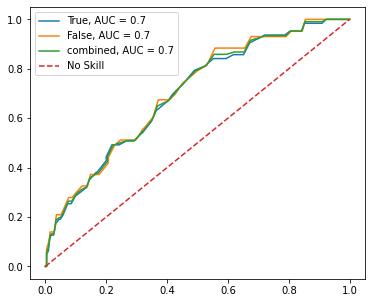

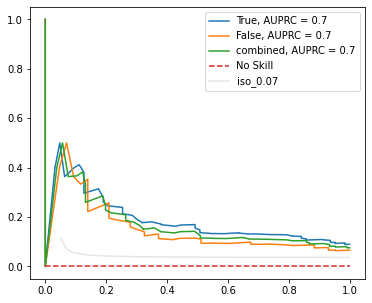

In [4]:
matplotlib.rcParams['figure.figsize'] = [6, 5]

fig_roc, ax_roc = plt.subplots()
fig_pr, ax_pr = plt.subplots()

for function in [True, False, "combined"]:
    entero = enteroOrg
    if function != "combined":
        entero = enteroOrg[enteroOrg["has_stop"]==function].copy()
        
    entero["reactive"] = entero["reactiveSamples"] > 0
    fpr, tpr, _ = roc_curve(entero["reactive"], entero["proba"])
    auc_score = round(metrics.roc_auc_score(entero["reactive"], entero["proba"]) ,2)       
    auprc_score = round(metrics.average_precision_score(entero["reactive"], entero["proba"]) ,2)       
    precision, recall, _ = precision_recall_curve(entero["reactive"], entero["proba"])
    ax_roc.plot(fpr, tpr, label=str(function) + ", AUC = " + str(auc_score))
    ax_pr.plot(recall, precision, label=str(function) + ", AUPRC = " + str(auc_score))

ax_roc.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
ax_pr.plot([0, 1], [0, 0], linestyle='--', label='No Skill')
f_score = entero["reactive"].value_counts()[1]/len(entero["reactive"])
x = np.linspace(0.01, 1)
yf = f_score * x / (2 * x - f_score)
ax_pr.plot(x[yf >= 0], yf[yf >= 0], color='gray', alpha=0.2, label = "iso_"+str(round(f_score,2)))
plt.ylim([-0.05, 1.05])
ax_roc.legend()
ax_pr.legend()
plt.show()
#fig_roc.savefig('figures/entero_roc.pdf')  

In [189]:
# pull BepiPred3 Probabilities from files ../data/raw_output_Bepi3_full and ../data/raw_output_Bepi3
# enteroOrg["Bepi_proba"] = [getBepi3Score(row.pep_aa,row.taxon_id) for index, row in enteroOrg.iterrows()]

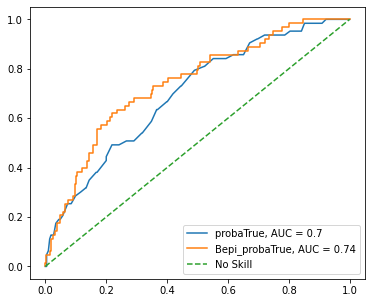

In [196]:
matplotlib.rcParams['figure.figsize'] = [6, 5]

fig_roc, ax_roc = plt.subplots()

for proba in ["proba", "Bepi_proba"]:
    #for function in [True, False, "combined"]:
    for function in [True]:
        entero = enteroOrg
        if function != "combined":
            entero = enteroOrg[enteroOrg["has_stop"]==function].copy()

        entero["reactive"] = entero["reactiveSamples"] > 0
        fpr, tpr, _ = roc_curve(entero["reactive"], entero[proba])
        auc_score = round(metrics.roc_auc_score(entero["reactive"], entero[proba]) ,2)       
        auprc_score = round(metrics.average_precision_score(entero["reactive"], entero[proba]) ,2)       
        precision, recall, _ = precision_recall_curve(entero["reactive"], entero[proba])
        ax_roc.plot(fpr, tpr, label=proba + str(function) + ", AUC = " + str(auc_score))

ax_roc.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
f_score = entero["reactive"].value_counts()[1]/len(entero["reactive"])
x = np.linspace(0.01, 1)
yf = f_score * x / (2 * x - f_score)
ax_pr.plot(x[yf >= 0], yf[yf >= 0], color='gray', alpha=0.2, label = "iso_"+str(round(f_score,2)))
plt.ylim([-0.05, 1.05])
ax_roc.legend()
plt.show()
#fig_roc.savefig('figures/entero_roc.pdf')  